Ans 1 : The Resulting matrix will have dimensions (n,m)
To compute each element C[i][j] of the resulting matrix C, we will have  to perform k multiplications and k-1 additions.
since there are n rows and m columns in the resulting matrix we need to perform these operations n*m times therefore total number of multiplications  

In [6]:
def matrix_multiply_list_of_lists(A, B):
    n, k = len(A), len(A[0])
    k_, m = len(B), len(B[0])

    # Check if the matrices can be multiplied
    if k != k_:
        raise ValueError(" dimensions are not correct for multiplication")

    # Initializing resulting matrix C with zeros
    C = [[0 for _ in range(m)] for _ in range(n)]

    # Perform matrix multiplication
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]

    return C


A = [[3, 4], [5, 6]]
B = [[7, 8], [9, 10]]

result_list_of_lists = matrix_multiply_list_of_lists(A, B)
print("Result using list of lists:", result_list_of_lists)


Result using list of lists: [[57, 64], [89, 100]]


Ans 2: Using numpy 

In [7]:
import numpy as np

def matrix_multiply_numpy(A, B):

    A_np, B_np = np.array(A), np.array(B)

    #  matrix multiplication using NumPy
    C_np = np.dot(A_np, B_np)

    return C_np.tolist()  # Convert the result back to a list of lists


A_np = np.array([[3, 4], [5, 6]])
B_np = np.array([[7, 8], [9, 10]])

result_numpy = matrix_multiply_numpy(A_np, B_np)
print("Result using NumPy:", result_numpy)


Result using NumPy: [[57, 64], [89, 100]]


Comparing the time for both of them


 NumPy is generally faster than using a list of lists for matrix operations because it is implemented in C and optimized for numerical computations. It uses efficient algorithms and memory layouts, which result in better performance. The difference in speed becomes more significant for larger matrices.

Ans 3 . Using the above method to find the median of an array it will take approx O(nlogn) time This is because finding the median involves multiple passes through the array, and for each pass, you are essentially finding the maximum or minimum element, which requires a linear scan.
The efficient method that I can suggest is quickselect algo which is a variation of the QuickSort algorithm. QuickSelect is used to find the k-th smallest (or largest) element in an unordered list in linear time approx.i.e. O(N) time in average case

Implimentation of both methods 

In [11]:
import numpy as np
import time

def find_median_multiple_passes(arr):
    """Finds the median using multiple passes through the array."""
    arr = sorted(arr)  # Sort the array
    mid = len(arr) // 2
    if len(arr) % 2 == 0:
        return (arr[mid - 1] + arr[mid]) / 2
    else:
        return arr[mid]

def find_median_quickselect(arr):
    """Finds the median using the Quickselect algorithm."""
    def quickselect(arr, left, right, k):
        if left == right:
            return arr[left]
        pivot_index = partition(arr, left, right)
        if k == pivot_index:
            return arr[k]
        elif k < pivot_index:
            return quickselect(arr, left, pivot_index - 1, k)
        else:
            return quickselect(arr, pivot_index + 1, right, k)

    def partition(arr, left, right):
        pivot = arr[right]
        i = left - 1
        for j in range(left, right):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[right] = arr[right], arr[i + 1]
        return i + 1

    n = len(arr)
    mid = n // 2
    return quickselect(arr, 0, n - 1, mid)

# Generate a large array for testing
arr = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
naive = find_median_multiple_passes(arr)
quickselect = find_median_quickselect(arr)
print("Median using naive method:",naive)
print("Time using naive method:",quickselect)
# Time each method
start_time = time.time()
median1 = find_median_multiple_passes(arr.copy())
end_time = time.time()
print("Multiple passes:", end_time - start_time)

start_time = time.time()
median2 = find_median_quickselect(arr.copy())
end_time = time.time()
print("Quickselect:", end_time - start_time)

start_time = time.time()
median3 = np.median(arr)
end_time = time.time()
print("NumPy median:", end_time - start_time)

Median using naive method: 4
Time using naive method: 4
Multiple passes: 0.0
Quickselect: 0.0
NumPy median: 0.0012683868408203125


  Ans 4  $$f(x)=x^{2}+y^{3}(sinx)$$

In [4]:
import sympy as sp

# Define the symbolic variables
x, y = sp.symbols('x y')

# Define the function
f = x**2 + y**3 * sp.sin(x)

# Calculating  the partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# partial derivatives
df_dx, df_dy


(2*x + y**3*cos(x), 3*y**2*sin(x))

In [17]:
# the gradient vector
gradient_vector = sp.Matrix([df_dx, df_dy])

# Display the gradient vector
gradient_vector


Matrix([
[2*x + y**3*cos(x)],
[    3*y**2*sin(x)]])

Ans 5:

In [6]:
import jax
import jax.numpy as jnp
from jax import grad


In [13]:
def f(x, y):
    result = x**2 * y + y**3 * jnp.sin(x)
    return jnp.reshape(result, ())  # Indentation aligned with "result"


In [7]:
# Genrating random values for x and y
key = jax.random.PRNGKey(42)  # Set a random seed for reproducibility
x = jax.random.uniform(key, shape=(1,))
y = jax.random.uniform(key, shape=(1,))


In [8]:
# Calculating the analytical gradient
analytical_grad = jnp.array([2 * x * y + y**3 * jnp.cos(x), x**2 + 3 * y**2 * jnp.sin(x)])


In [14]:
jax_grad = grad(f)(x, y)


In [15]:
#comapring the gradient
print("Analytical gradient:", analytical_grad)
print("JAX gradient:", jax_grad)

difference = jnp.linalg.norm(analytical_grad - jax_grad)
print("Difference:", difference)


Analytical gradient: [[0.4349301 ]
 [0.40820223]]
JAX gradient: [0.4349301]
Difference: 0.026727855


 As we notice from above the difference is very small (close to 0), it indicates that the gradients evaluated by JAX match the analytical solution, so the gradient is correct

Ans 6 Using sympy for gradient calculation

In [16]:
import sympy as np
x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)
grad_f = sp.Matrix([f.diff(x), f.diff(y)])
print(grad_f)


Matrix([[2*x*y + y**3*cos(x)], [x**2 + 3*y**2*sin(x)]])


Ans 7: Creating student directory in python

In [15]:
students_data = {
    2022: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'Ramesh',
            'Marks': {
                'Maths': 100,
                'English': 70,
                'Hindi':85
                
            }
        },
        'Branch 2': {
            'Name': 'shyam',
            'Marks': {
                'Maths': 100,
                'English': 70,
                'Hindi':85
        }
    },
    }
}
print("Student Name in 2022, Branch 1, Roll Number 1:", students_data[2022]['Branch 1']['Name'])
print("Maths Marks in 2022, Branch 1, Roll Number 1:", students_data[2022]['Branch 1']['Marks']['Maths'])


Student Name in 2022, Branch 1, Roll Number 1: Ramesh
Maths Marks in 2022, Branch 1, Roll Number 1: 100


Ans 8:


In [20]:
class Student:
    def __init__(self, roll_number, name):
        self.roll_number = roll_number
        self.name = name
        self.marks = {}

    def add_subject_marks(self, subject, marks):
        self.marks[subject] = marks


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)


class AcademicYear:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)


# database as a list of AcademicYear objects
database = []


year_2022 = AcademicYear(2022)
year_2023 = AcademicYear(2023)
year_2024 = AcademicYear(2024)
year_2025 = AcademicYear(2025)

# Create Branch objects
branch_1 = Branch('Branch 1')
branch_2 = Branch('Branch 2')

# Create Student objects
student_2022_branch_1 = Student(1, 'Raju')
student_2022_branch_1.add_subject_marks('Maths', 100)
student_2022_branch_1.add_subject_marks('English', 70)

# Adding students to branches
branch_1.add_student(student_2022_branch_1)

# Add branches to academic years
year_2022.add_branch(branch_1)
year_2022.add_branch(branch_2)

# Adding academic years to the  database
database.append(year_2022)
database.append(year_2023)
database.append(year_2024)
database.append(year_2025)

# Accessing data example:
print("Student Name in 2022, Branch 1, Roll Number 1:", database[0].branches[0].students[0].name)
print("Maths Marks in 2022, Branch 1, Roll Number 1:", database[0].branches[0].students[0].marks['Maths'])


Student Name in 2022, Branch 1, Roll Number 1: Raju
Maths Marks in 2022, Branch 1, Roll Number 1: 100


Ans 9: Using Matplotlib to plot given functios

y=x

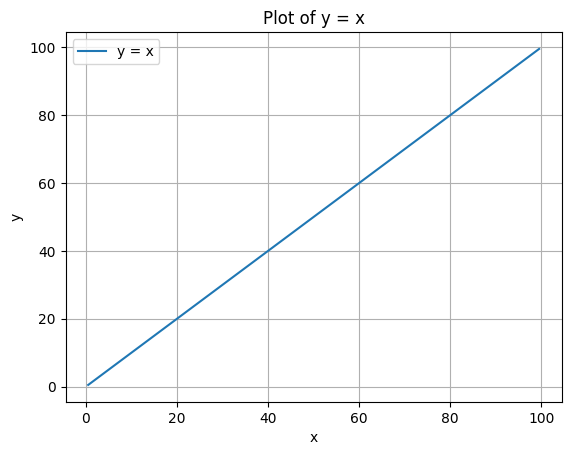

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.0, 0.5)

# corresponding y values
y_values = x_values

# Plot the function
plt.plot(x_values, y_values, label='y = x')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')

plt.grid(True)

plt.legend()

plt.show()


$$y=x^2$$

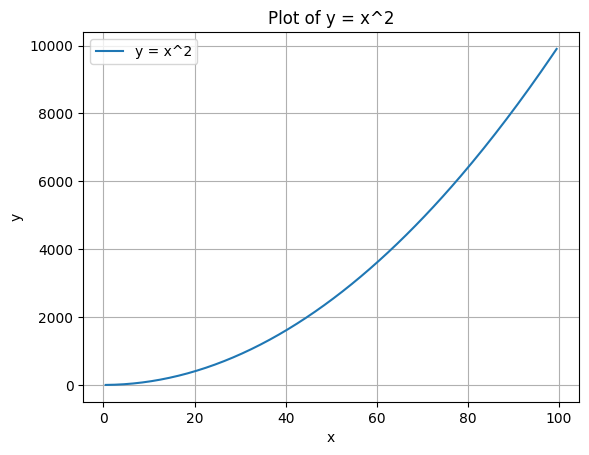

In [5]:
import matplotlib.pyplot as plt
import numpy as np


x_values = np.arange(0.5, 100.0, 0.5)


y_values = x_values**2


plt.plot(x_values, y_values, label='y = x^2')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')

plt.grid(True)

plt.legend()

plt.show()


$$y=x^3/100$$

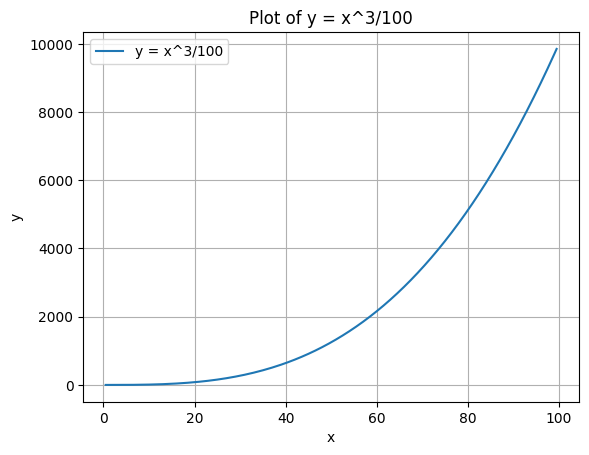

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.0, 0.5)

#  corresponding y values
y_values = (x_values**3) / 100

# Plotting the function
plt.plot(x_values, y_values, label='y = x^3/100')

# Adding labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^3/100')


plt.grid(True)


plt.legend()

plt.show()


$$y=sin(x)$$

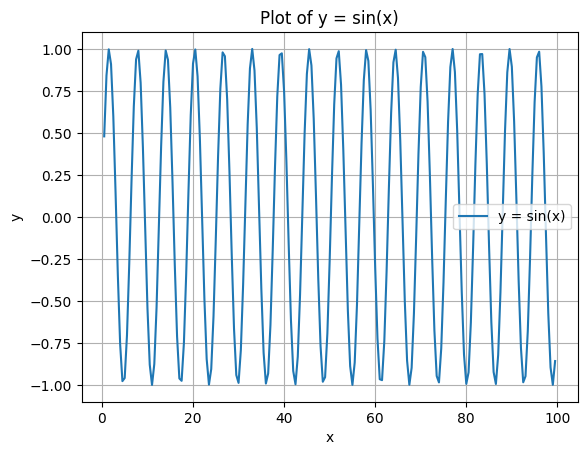

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.0, 0.5)

# Calculate corresponding y values
y_values = np.sin(x_values)

# Plot the function
plt.plot(x_values, y_values, label='y = sin(x)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


$$y=sin(x)/x$$

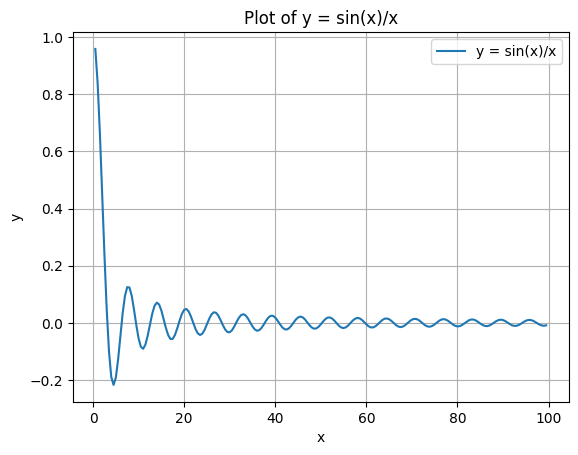

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain, excluding the singularity
x_values = np.arange(0.5, 100.0, 0.5)

# Calculate corresponding y values
y_values = np.sin(x_values) / x_values

# Plot the function
plt.plot(x_values, y_values, label='y = sin(x)/x')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)/x')

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


$$y=log(x)$$

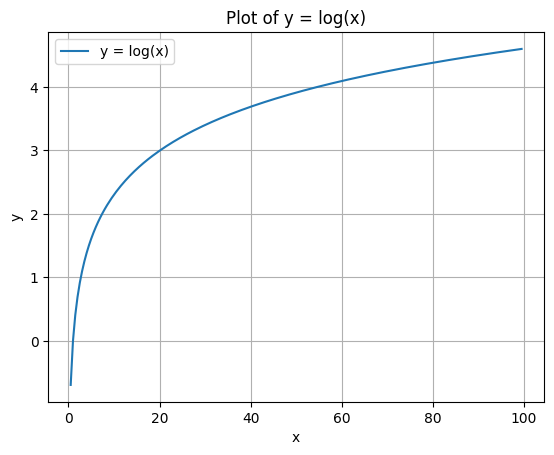

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.0, 0.5)

# Calculate corresponding y values
y_values = np.log(x_values)

# Plot the function
plt.plot(x_values, y_values, label='y = log(x)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = log(x)')

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


$$y=e^x$$

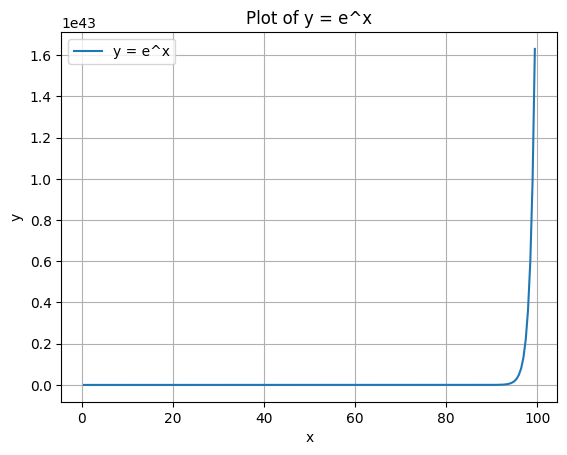

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.0, 0.5)

# Calculate corresponding y values
y_values = np.exp(x_values)

# Plot the function
plt.plot(x_values, y_values, label='y = e^x')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e^x')

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


Ans 10:

In [12]:
import numpy as np
import pandas as pd

# Generate a 20x5 matrix with random numbers drawn uniformly from the range [1, 2)
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame from the matrix with column names "a", "b", "c", "d", "e"
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Find the column with the highest standard deviation
highest_std_col = df.std().idxmax()

# Find the row with the lowest mean
lowest_mean_row = df.mean(axis=1).idxmin()

# Display the DataFrame
print("DataFrame:")
print(df)

# Display the results
print("\nColumn with the highest standard deviation:", highest_std_col)
print("Row with the lowest mean:", lowest_mean_row)


DataFrame:
           a         b         c         d         e
0   1.895687  1.806941  1.988450  1.269757  1.521137
1   1.201917  1.529771  1.126088  1.039879  1.325093
2   1.476772  1.218608  1.144188  1.178955  1.850133
3   1.563281  1.180726  1.201031  1.396255  1.121389
4   1.396851  1.340081  1.546713  1.273461  1.603648
5   1.131374  1.227458  1.803499  1.643924  1.034883
6   1.532891  1.369766  1.381030  1.291425  1.659630
7   1.861151  1.172150  1.353905  1.294651  1.225917
8   1.706340  1.715536  1.206324  1.509384  1.300016
9   1.208042  1.598967  1.578989  1.652917  1.112530
10  1.078379  1.696951  1.001789  1.549764  1.683139
11  1.638075  1.044627  1.773957  1.113288  1.379187
12  1.251657  1.734358  1.473926  1.220499  1.138289
13  1.920900  1.341176  1.428631  1.204232  1.228437
14  1.979519  1.016034  1.424851  1.667378  1.618855
15  1.513995  1.067994  1.988085  1.996732  1.639593
16  1.046189  1.145045  1.564040  1.616244  1.122458
17  1.656531  1.446720  1.314819  1

Ans 11

In [13]:
import numpy as np
import pandas as pd

# Generate a 20x5 matrix with random numbers drawn uniformly from the range [1, 2)
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame from the matrix with column names "a", "b", "c", "d", "e"
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Add a new column "f" which is the sum of columns "a", "b", "c", "d", "e"
df['f'] = df.sum(axis=1)

# Create a column "g" with values "LT8" if "f" is less than 8, and "GT8" otherwise
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where the value in column "g" is "LT8"
lt8_count = (df['g'] == 'LT8').sum()

# Find the standard deviation of column "f" for rows where "g" is "LT8" and "GT8" respectively
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

# Display the modified DataFrame
print("Modified DataFrame:")
print(df)

# Display the results
print("\nNumber of rows where 'g' is 'LT8':", lt8_count)
print("Standard deviation of 'f' for rows where 'g' is 'LT8':", std_lt8)
print("Standard deviation of 'f' for rows where 'g' is 'GT8':", std_gt8)


Modified DataFrame:
           a         b         c         d         e         f    g
0   1.179774  1.300558  1.902781  1.598517  1.164406  7.146034  LT8
1   1.273156  1.019678  1.152334  1.533694  1.558862  6.537724  LT8
2   1.685044  1.517831  1.632369  1.629935  1.814694  8.279874  GT8
3   1.407629  1.478025  1.139990  1.058969  1.180756  6.265369  LT8
4   1.059495  1.698768  1.836479  1.480425  1.065038  7.140205  LT8
5   1.910234  1.301780  1.595132  1.130189  1.412663  7.349999  LT8
6   1.133999  1.191675  1.234058  1.663096  1.124805  6.347633  LT8
7   1.697769  1.702332  1.708067  1.107842  1.112479  7.328488  LT8
8   1.180638  1.875920  1.008216  1.564158  1.514832  7.143763  LT8
9   1.824065  1.813857  1.573802  1.379781  1.967011  8.558516  GT8
10  1.913587  1.161037  1.307627  1.672735  1.665081  7.720067  LT8
11  1.298842  1.470755  1.131022  1.507076  1.513441  6.921136  LT8
12  1.793155  1.501890  1.042564  1.616637  1.344999  7.299245  LT8
13  1.116042  1.405552  1.27

Ans 12: Broadcasting in numpy

In [14]:
import numpy as np

# Example 1: Broadcasting a scalar to an array
scalar_value = 3
array_1 = np.array([1, 2, 3, 4, 5])

result_1 = scalar_value * array_1

print("Array 1:", array_1)
print("Result 1:", result_1)

# Example 2: Broadcasting a 1D array to a 2D array
array_2d = np.array([[1, 2, 3], [4, 5, 6]])

array_1d = np.array([10, 20, 30])

result_2 = array_2d + array_1d

print("\nArray 2D:")
print(array_2d)
print("\nArray 1D:", array_1d)
print("Result 2:")
print(result_2)


Array 1: [1 2 3 4 5]
Result 1: [ 3  6  9 12 15]

Array 2D:
[[1 2 3]
 [4 5 6]]

Array 1D: [10 20 30]
Result 2:
[[11 22 33]
 [14 25 36]]


Ans 13

Index of min element in array

In [23]:
import numpy as np

def argmin_custom(arr):
    return np.argmin(arr)

my_array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])
custom_argmin_result = argmin_custom(my_array)

# Verify the result using np.argmin
numpy_argmin_result = np.argmin(my_array)

print("Custom argmin result:", custom_argmin_result)
print("NumPy argmin result:", numpy_argmin_result)


Custom argmin result: 1
NumPy argmin result: 1
